In [54]:

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd


In [21]:
image_path = "lungcancer"

In [42]:
SIZE_X = SIZE_Y = 224

datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)

training = datagen.flow_from_directory(image_path,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

validation = datagen.flow_from_directory(image_path,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)
test = ImageDataGenerator(rescale=1./255)
testing = test.flow_from_directory(
                                        image_path,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 1, 
                                       shuffle = False,
                                       seed = 42)


Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.
Found 15000 images belonging to 3 classes.


In [43]:
IMAGE_SIZE = [224, 224]

In [44]:
resnet = ResNet50(input_shape=([224, 224] + [3]), weights='imagenet', include_top=False)

In [45]:
for layer in resnet.layers:
    layer.trainable = False

In [46]:
flatten = Flatten()(resnet.output)
dense = Dense(256, activation = 'relu')(flatten)
dense = Dense(128, activation = 'relu')(dense)
prediction = Dense(3, activation = 'softmax')(dense)

In [47]:
model = Model(inputs = resnet.input, outputs = prediction )


In [48]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [49]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping 
es = EarlyStopping(monitor="val_loss", patience=2)

In [51]:

history = model.fit(training, validation_data = (validation), epochs = 3, verbose = 1, callbacks=[es])

Epoch 1/3
14/94 [===>..........................] - ETA: 4:16 - loss: 38.0460 - accuracy: 0.4509

KeyboardInterrupt: 

PLOTING THE GRAPHS

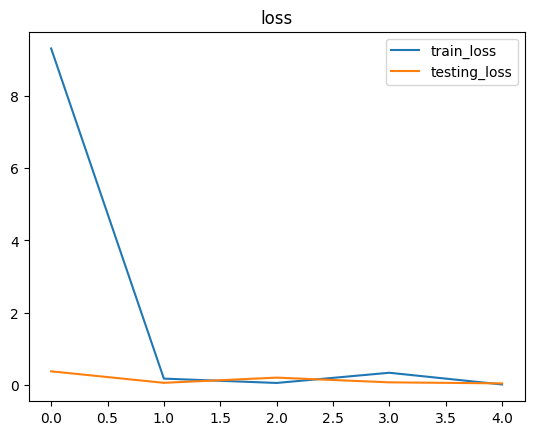

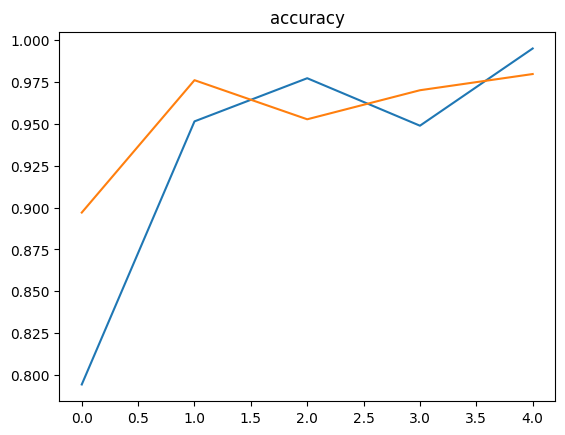

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'testing_loss')
plt.title('loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label="Train_accuracy")
plt.plot(history.history['val_accuracy'], label="Validation_Accuracy")
plt.title('accuracy')
plt.show()



In [16]:
result = model.evaluate(testing,batch_size=128)
print("test_loss, test accuracy",result)

17/24 [====================>.........] - ETA: 21s - loss: 0.0197 - accuracy: 0.9908

KeyboardInterrupt: 

PICKLING THE MODEL 

In [23]:
import pickle
import numpy as np
with open("RESNET50_pickle", "wb") as f:
    pickle.dump(model, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......activation
.........vars
......activation_1
.........vars
......activation_10
.........vars
......activation_11
.........vars
......activation_12
.........vars
......activation_13
.........vars
......activation_14
.........vars
......activation_15
.........vars
......activation_16
.........vars
......activation_17
.........vars
......activation_18
.........vars
......activation_19
.........vars
......activation_2
.........vars
......activation_20
.........vars
......activation_21
.........vars
......activation_22
.........vars
......activation_23
.........vars
......activation_24
.........vars
......activation_25
.........vars
......activation_26
.........vars
......activation_27
.........vars
......activation_28
.........vars
......activation_29
.........vars
......activation_3
.........vars
......activation_30
.........vars
......activation_31
.........vars
......activation_32
.........vars
......activa

#Confusion Matrix and f1 score

In [55]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pred  = model.predict(validation)
Pred = np.argmax(pred, axis=1)
conf_mat = confusion_matrix(validation.classes, pred)
print(conf_mat)


24/24 [==============================] - 71s 3s/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets